<a href="https://colab.research.google.com/github/dhenneyse/dhenneyse/blob/main/Regressao%20Multipla%20-%20Pre%C3%A7o%20de%20uma%20casa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear Múltipla**

* **Prever o preço de uma casa.**

* *Quais características são mais importantes?* 
      
      

In [84]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

dados = pd.read_csv("https://raw.githubusercontent.com/dhenneyse/dhenneyse/main/data.csv")

dados.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [45]:
dados.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


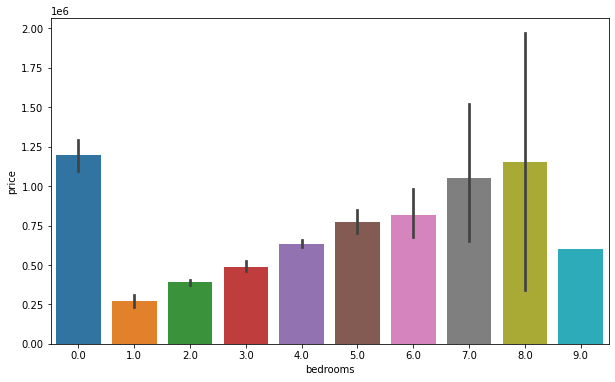

In [92]:
#Preço médio de acordo com o número de quartos:
plt.figure(figsize=(10,6))
sns.barplot(x=dados.bedrooms, y=dados['price'])

#Existe um número alto de casas com número de quartos igual a zero.

In [76]:
#Preços de acordo com a quantidade de quartos
quartos = dados.groupby(['bedrooms']).price.agg([len, min, max])
quartos

#Existem casas com preço igual a zero.

,len,min,max
bedrooms,,,
0.0,2.0,1095000.0,1295648.0
1.0,38.0,0.0,540000.0
2.0,566.0,0.0,1695000.0
3.0,2032.0,0.0,26590000.0
4.0,1531.0,0.0,4489000.0
5.0,353.0,0.0,7062500.0
6.0,61.0,0.0,3100000.0
7.0,14.0,280000.0,3200000.0
8.0,2.0,340000.0,1970000.0


In [79]:
#Verificar a quantidade de casas com valor nulo
dados_zero= dados[dados.price==0]
print('Existem '+str(len(dados_zero))+' casas sem preço.')

Existem 49 casas sem preço.


In [94]:
#Remover casas com valores elevados, com quantidade de quartos igual a zero e preço igual a zero.
dados_o = dados[(dados.price<2.5*10**7) & (dados.bedrooms>0) & (dados.price>0)].copy()


In [103]:
#Foram escolhidos os itens "bedrooms,	bathrooms e	sqft_living"
X = dados_o.iloc[:,[1,2,3]].values
y = dados_o.iloc[:,[0]].values

In [100]:
X_train = X[0:35]
X_test = X[35:] 

In [101]:
y_train = y[0:35]
y_test = y[35:]

In [102]:
#Treinar um modelo de regressão múltipla e imprimir os coeficientes 
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.799
Method:                 Least Squares   F-statistic:                              47.47
Date:                Fri, 02 Apr 2021   Prob (F-statistic):                    6.92e-12
Time:                        20:31:30   Log-Likelihood:                         -491.24
No. Observations:                  35   AIC:                                      988.5
Df Residuals:                      32   BIC:                                      993.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [96]:
#Análise de correlação, verificar quais atributos interferem mais no resultado, após a atualização dos dados.

dados_o.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.298093,0.473638,0.624519,0.073131,0.221824,0.207156,0.336839,0.042480,0.531923,0.308729,0.019494,-0.029203
bedrooms,0.298093,1.000000,0.545640,0.601597,0.071415,0.180789,-0.005681,0.117137,0.022071,0.492024,0.335026,0.143099,-0.060489
bathrooms,0.473638,0.545640,1.000000,0.761587,0.109565,0.493984,0.063315,0.207221,-0.121770,0.692507,0.295530,0.465919,-0.217157
sqft_living,0.624519,0.601597,0.761587,1.000000,0.213295,0.342904,0.107924,0.309491,-0.061875,0.875404,0.450633,0.284702,-0.122969
sqft_lot,0.073131,0.071415,0.109565,0.213295,1.000000,0.004366,0.017406,0.072726,0.000977,0.219335,0.035885,0.049191,-0.021136
floors,0.221824,0.180789,0.493984,0.342904,0.004366,1.000000,0.015897,0.030175,-0.273451,0.521917,-0.254972,0.467045,-0.237878
waterfront,0.207156,-0.005681,0.063315,0.107924,0.017406,0.015897,1.000000,0.347814,0.006103,0.072697,0.088858,-0.031986,0.015857
view,0.336839,0.117137,0.207221,0.309491,0.072726,0.030175,0.347814,1.000000,0.062957,0.174468,0.317607,-0.066630,0.025277
condition,0.042480,0.022071,-0.121770,-0.061875,0.000977,-0.273451,0.006103,0.062957,1.000000,-0.176008,0.197131,-0.398952,-0.184082
sqft_above,0.531923,0.492024,0.692507,0.875404,0.219335,0.521917,0.072697,0.174468,-0.176008,1.000000,-0.037043,0.406578,-0.163085


In [132]:
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 137323884689.55


In [130]:
print('Variance score: %.2f' % r2_score(y_test, y_pred)) 

Variance score: 0.19


In [131]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 165301.43896718 -245535.68834577     343.79557085]]
